<a href="https://colab.research.google.com/github/smarvar/endmembers/blob/main/MultispectralAnalisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all content drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the following packages
import os, sys
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# rute HSI
path = "/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/hyp/"
# list with HSI
dirs = os.listdir(path)


In [ ]:
"""# rename bands name. Only bands number
for file in dirs:
  #file.find('WL_') #encontrar la posición que contiene el número de la banda
  im1 = Image.open(path+file)
  im1 = im1.save(path+'rename/'+file[56:62]+'.tif') #
im1.close()"""

In [ ]:
# Generate hypercube with all bands 

cont=0
path2 =path+'rename/'
dirs2 = os.listdir(path2)
dirs2 = sorted(dirs2)
n_bands = len(dirs2)
hypercube = np.zeros(shape=(648,1022,n_bands))

for file in dirs2:
  im = Image.open(path2+file)
  hypercube[:,:,cont] = im
  cont+=1 
im.close()

In [ ]:
# Generate list with bands numbers
dirs3 = []
for a in dirs2:
  dirs3.append(a[0:5])

In [ ]:
len (dirs3)

386

In [ ]:
# See a hypercube band
print(hypercube[:,:,200])

[[    0.     0.     0. ...  3428.  6125.  1666.]
 [    0.     0.     0. ...  1858.  5342.  2631.]
 [    0.     0.     0. ...  2161.  4665.  1106.]
 ...
 [15561. 14448. 14737. ...     0.     0.     0.]
 [17509. 15225. 15503. ...     0.     0.     0.]
 [13686. 14909. 15503. ...  4105.  1704.  3191.]]


<Figure size 720x360 with 0 Axes>

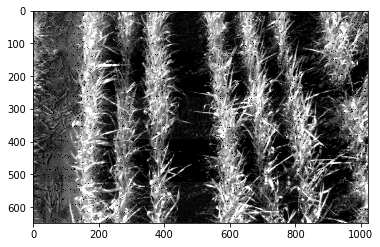

In [ ]:
# Plot a hypercube band
fig = plt.figure(figsize=(10,5))   
fig, (ax1) = plt.subplots(1, 1)
ax1.set_title('')
ax1.imshow(hypercube[:,:,300], cmap = 'gray')

In [ ]:
pip install pysptools # Install the pysptools library that contains the Endmembers algorithms to use 

     |████████████████████████████████| 8.1MB 3.8MB/s 
  Created wheel for pysptools: filename=pysptools-0.15.0-cp27-none-any.whl size=8133750 sha256=55b954724de2b5234d4df338460e2bf6b9f66d8dcaed97481aa1c0db3e5eeab5
  Stored in directory: /root/.cache/pip/wheels/bf/60/be/a6719d91bfa59135201feb034c7069e4146aa576fc0dc9e624
Successfully built pysptools


In [ ]:
#  import the following packages to use
import pysptools.util as util
import pysptools.eea as eea #endmembers extraction algorithms
import pysptools.abundance_maps as amap
import pysptools.classification as cls
import pysptools.material_count as cnt
import time 

%matplotlib inline
#for clean output, to not print warnings, don't use when developing script
import warnings
warnings.filterwarnings('ignore')

N-FINDR endmembers induction algorithm.

In [ ]:
start_time = time.time()
ee = eea.NFINDR() #N-FINDR endmembers induction algorithm.
n_endmembers =36 # number endmembers to find
U = ee.extract(hypercube,n_endmembers,maxit=None,normalize=False,ATGP_init=True)
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time/60) + ' Minutes')

Time: 29.9443151673 Minutes


In [ ]:
U.shape

(36, 386)

In [ ]:
# Save endmembers found for FINDR() algorithm
import h5py
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_NFINDR.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=U)

In [ ]:
# Open endmembers found for FINDR() algorithm
f = h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_NFINDR.hdf5', 'r')
data = f['default']


In [ ]:
U.shape

(36, 386)

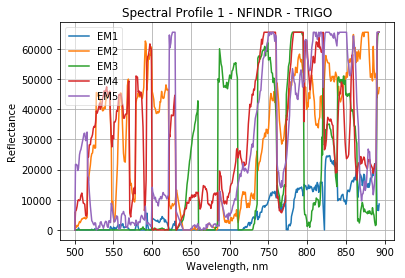

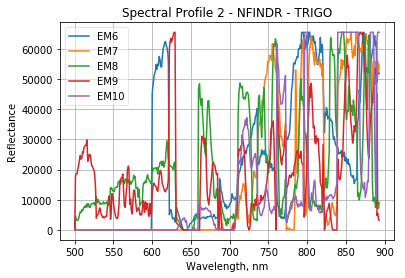

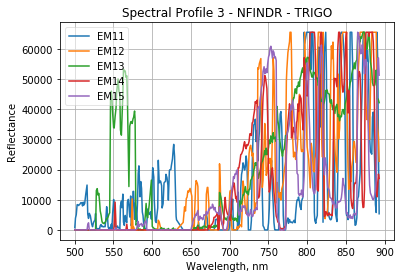

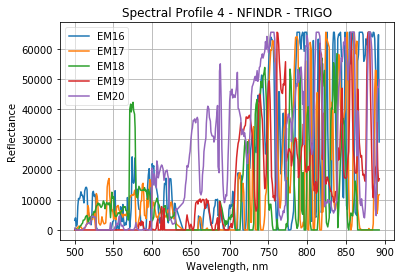

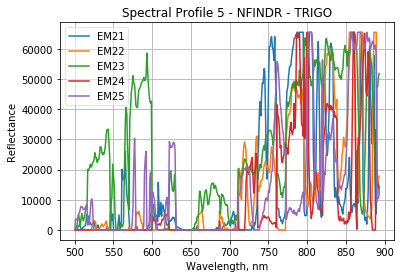

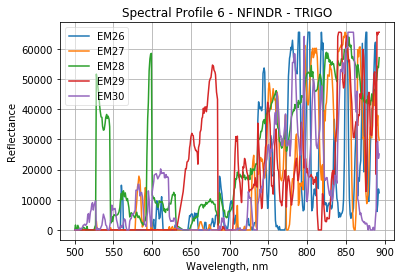

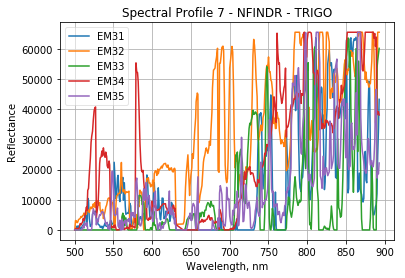

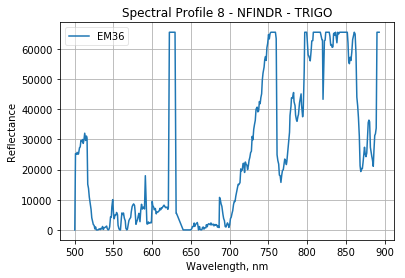

In [ ]:
# Spectral endmembers 
ee_axes = {}
ee_axes['wavelength'] = [float(i) for i in dirs3]
ee_axes['x']='Wavelength, nm' #x axis label
ee_axes['y']='Reflectance' #y axis label 
ee.display(axes=ee_axes,suffix='TRIGO')

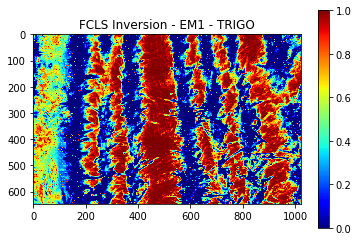

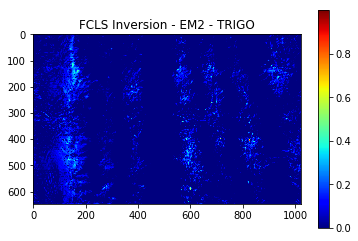

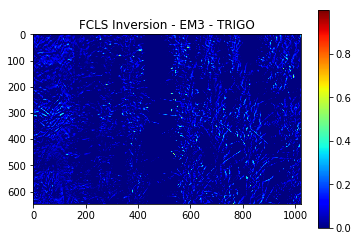

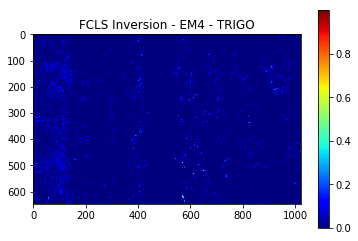

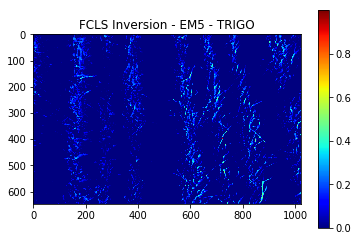

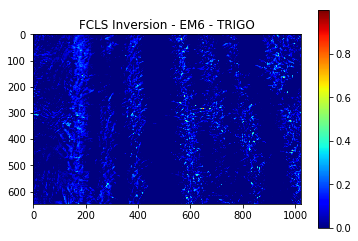

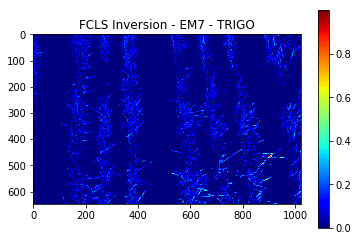

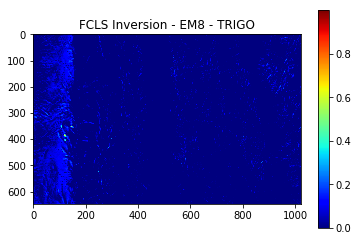

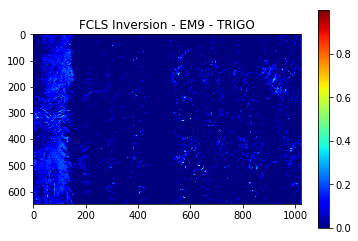

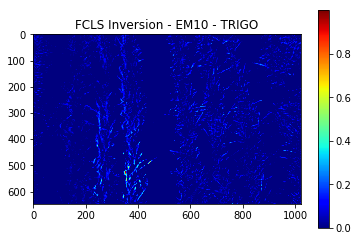

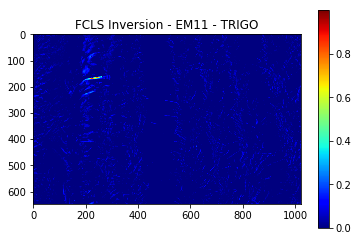

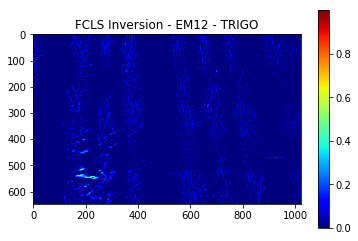

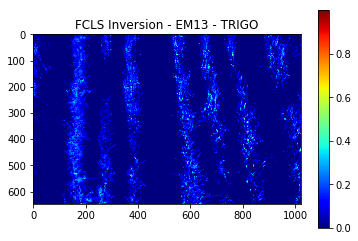

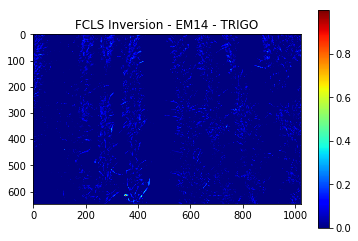

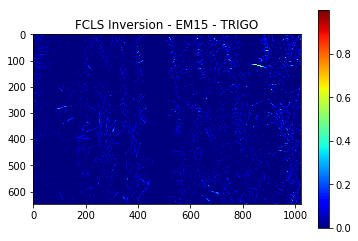

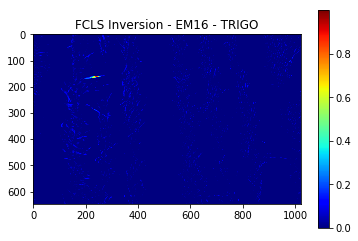

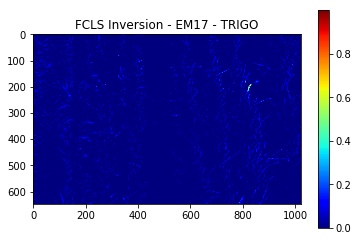

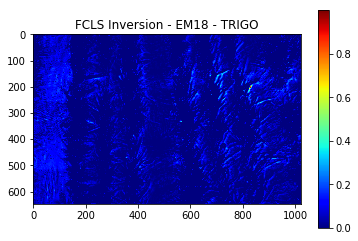

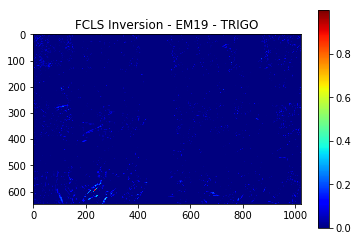

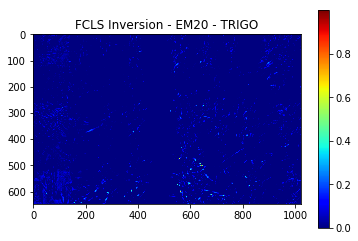

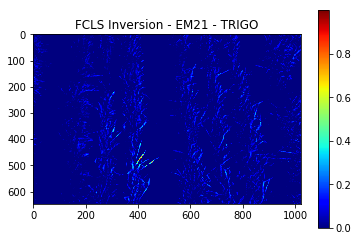

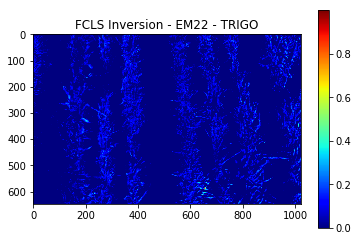

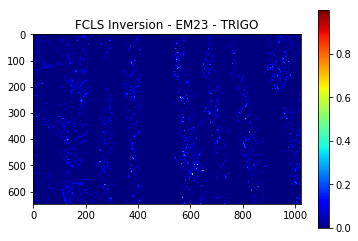

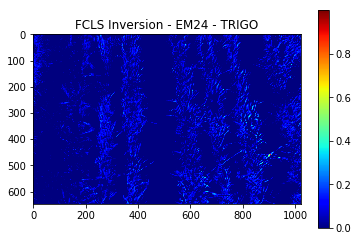

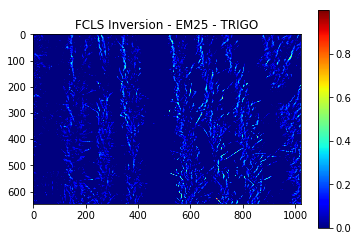

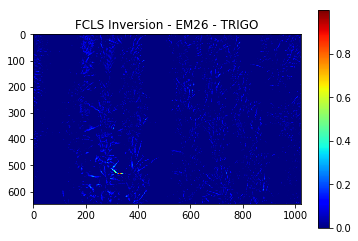

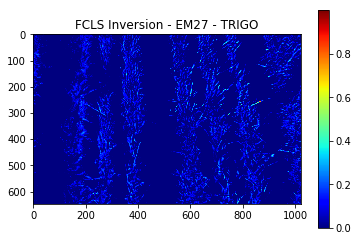

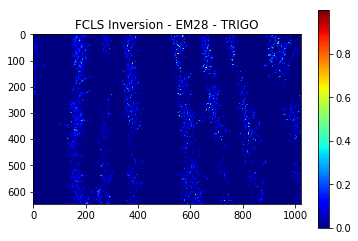

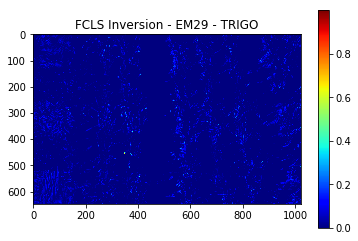

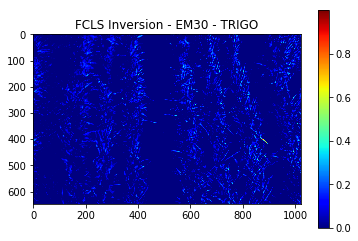

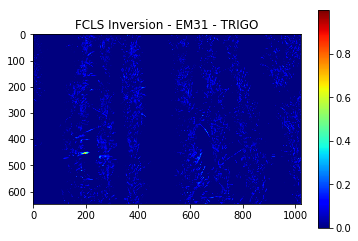

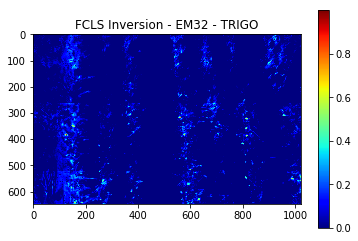

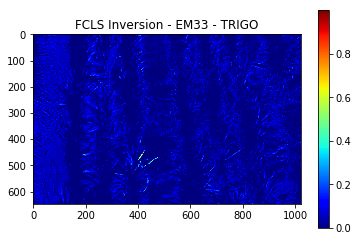

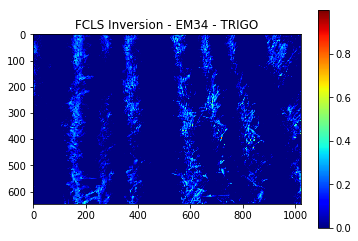

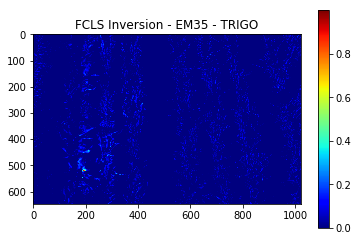

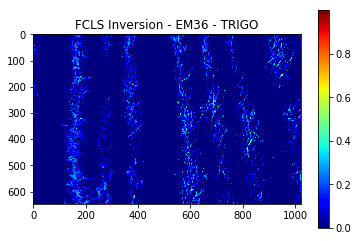

Time: 53.1761536002 Minutes


<Figure size 432x288 with 0 Axes>

In [ ]:
start_time = time.time()
am = amap.FCLS() #object amap Fully Constrained Least Squares
amaps = am.map(hypercube,U,normalize=False) 
am.display(colorMap='jet',columns=n_endmembers,suffix='TRIGO') # Plot abundance maps
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time/60) + ' Minutes')

In [ ]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/amaps_NFINDR.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=amaps)

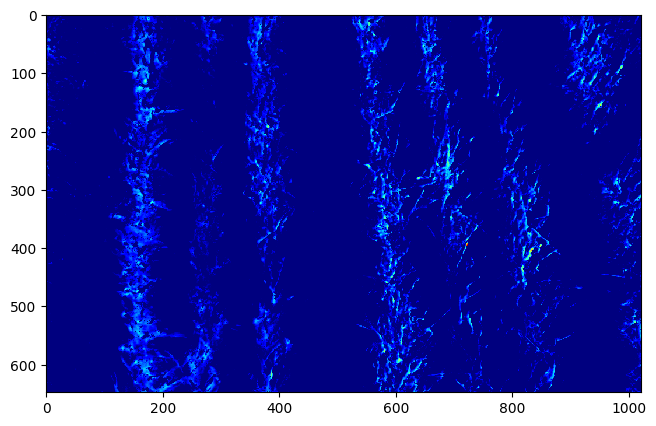

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5), dpi= 100)
plt.imshow(amaps[:,:,35], cmap='jet')
plt.show()

In [ ]:
print('Abundance Map Mean Values:')
print('EM1:',np.mean(amaps[:,:,0]))
print('EM2:',np.mean(amaps[:,:,1]))
print('EM3:',np.mean(amaps[:,:,2]))
print('EM4:',np.mean(amaps[:,:,3]))
print('EM5:',np.mean(amaps[:,:,4]))

Abundance Map Mean Values:
('EM1:', 0.29846594)
('EM2:', 0.11766512)
('EM3:', 0.25329566)
('EM4:', 0.24680753)
('EM5:', 0.083765686)


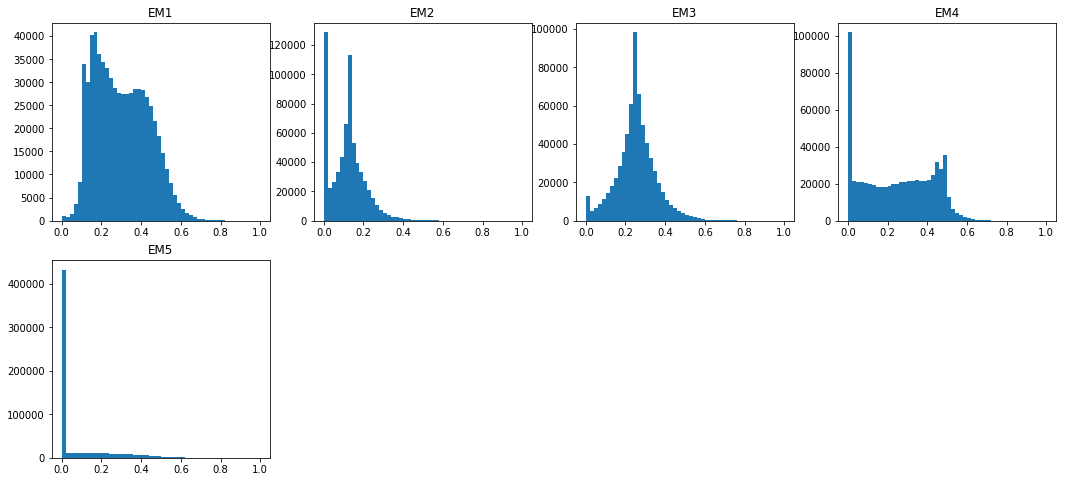

In [ ]:
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(2,4,1); plt.title('EM1')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,0]),bins=50,range=[0,1.0]) 

ax2 = fig.add_subplot(2,4,2); plt.title('EM2')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,1]),bins=50,range=[0,1.0]) 

ax3 = fig.add_subplot(2,4,3); plt.title('EM3')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,2]),bins=50,range=[0,1.0]) 

ax4 = fig.add_subplot(2,4,4); plt.title('EM4')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,3]),bins=50,range=[0,1.0]) 

ax4 = fig.add_subplot(2,4,5); plt.title('EM5')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,4]),bins=50,range=[0,1.0]) 

Automatic Target Generation Process (ATGP)

In [ ]:
start_time = time.time()
ee2 = eea.ATGP() #Automatic Target Generation Process (ATGP)
n_endmembers = 36
U2 = ee2.extract(hypercube,n_endmembers)
print('Time: ' + str(elapsed_time/60) + ' Minutes')

Time: 53.1761536002 Minutes


In [ ]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_ATGP.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=U2)

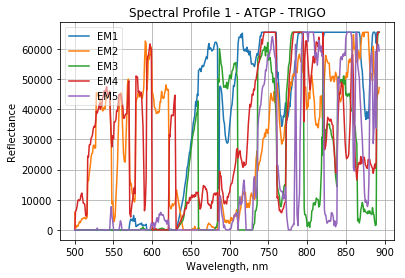

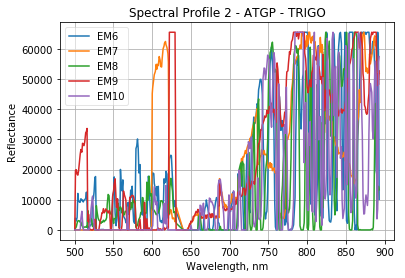

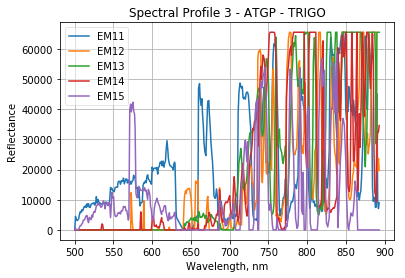

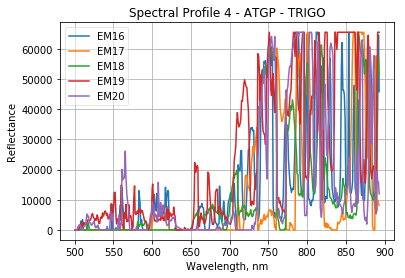

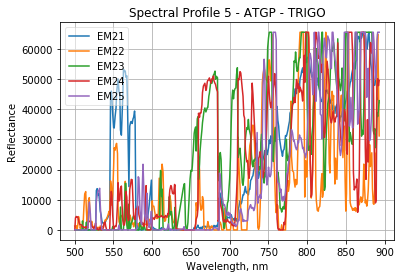

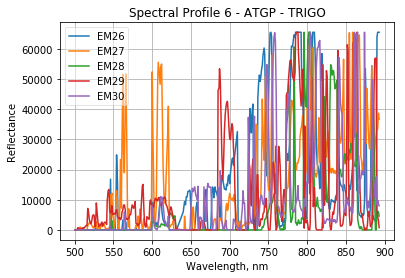

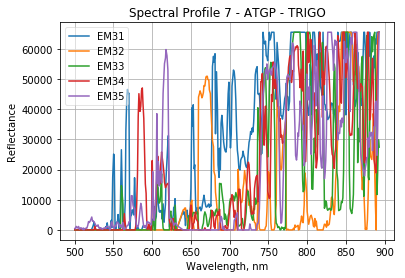

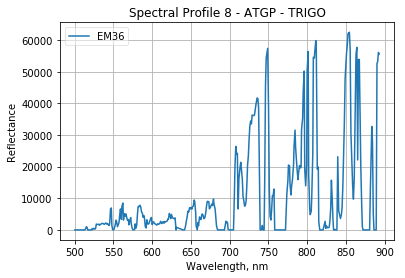

In [ ]:
ee2_axes = {}
ee2_axes['wavelength'] = [float(i) for i in dirs3]
ee2_axes['x']='Wavelength, nm' #x axis label
ee2_axes['y']='Reflectance' #y axis label 
ee2.display(axes=ee2_axes,suffix='TRIGO')

In [ ]:
start_time = time.time()
am2 = amap.FCLS() #Se define el objeto amap Fully Constrained Least Squares
amaps2 = am.map(hypercube,U2,normalize=False) #Se crea el mapa de abundancias para el Hypercubo segun los endmemberds encontrados
am2.display(colorMap='jet',columns=n_endmembers,suffix='TRIGO') # Grafico de mapa de abundancias por cada Endmemberd
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time/60) + ' Minutes')

In [ ]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/amaps_ATGP.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=amaps2)

In [ ]:
print('Abundance Map Mean Values:')
print('EM1:',np.mean(amaps[:,:,0]))
print('EM2:',np.mean(amaps[:,:,1]))
print('EM3:',np.mean(amaps[:,:,2]))
print('EM4:',np.mean(amaps[:,:,3]))
print('EM5:',np.mean(amaps[:,:,4]))

Abundance Map Mean Values:
('EM1:', 0.03773699)
('EM2:', 0.20394415)
('EM3:', 0.31555143)
('EM4:', 0.004074064)
('EM5:', 0.43869326)


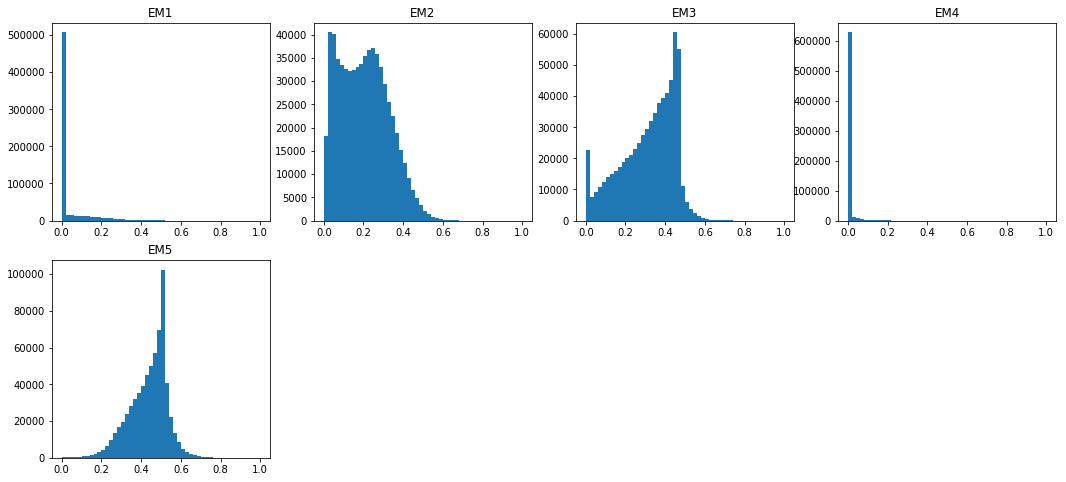

In [ ]:
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(2,4,1); plt.title('EM1')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,0]),bins=50,range=[0,1.0]) 

ax2 = fig.add_subplot(2,4,2); plt.title('EM2')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,1]),bins=50,range=[0,1.0]) 

ax3 = fig.add_subplot(2,4,3); plt.title('EM3')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,2]),bins=50,range=[0,1.0]) 

ax4 = fig.add_subplot(2,4,4); plt.title('EM4')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,3]),bins=50,range=[0,1.0]) 

ax4 = fig.add_subplot(2,4,5); plt.title('EM5')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,4]),bins=50,range=[0,1.0]) 

In [ ]:
from sklearn.metrics import cohen_kappa_score
[cohen_kappa_score(U[:,:][a], U2[:,:][a]) for a in range(n_endmembers)]

[0.02650363665022859,
 1.0,
 1.0,
 1.0,
 0.01919445112110718,
 0.011534147425451446,
 0.155965730026691,
 0.02898678473837324,
 0.006784241994048479,
 0.18072428459346723,
 0.02918686489665967,
 0.3110467920887602,
 0.06112870552654848,
 0.22940716951653506,
 -0.05827706530112797,
 0.0571315941376056,
 0.035723953378655526,
 -0.05827706530112842,
 0.014206325424282906,
 0.01863043387654728,
 0.020345553680746198,
 0.05138578501469493,
 0.024177360015894434,
 0.031903714393801574,
 0.11170171550775598,
 0.19563249250749237,
 0.0634021185353516,
 0.02835685974549773,
 -0.05710518308144863,
 0.018832058706511612,
 -0.015656534347254336,
 0.003753495737726986,
 0.09098822523607819,
 0.019144159654027826,
 0.04206477230425598,
 -0.0005088989462400662]

Fast Iterative Pixel Purity Index (FIPPI)

In [ ]:
start_time = time.time()
ee3 = eea.FIPPI() #Fast Iterative Pixel Purity Index (FIPPI)
n_endmembers =36
U3 = ee3.extract(hypercube,n_endmembers)
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time/60) + ' Minutes')

NameError: ignored

In [ ]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_FIPPI_2.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=U3)

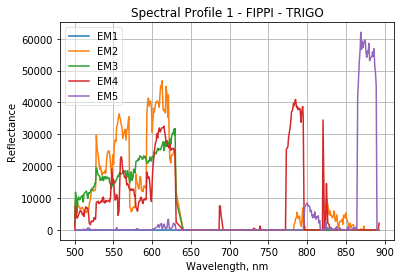

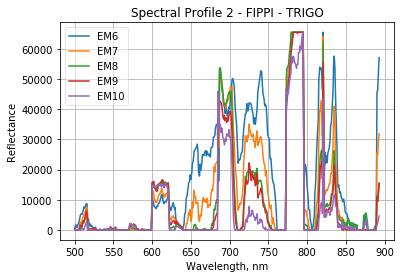

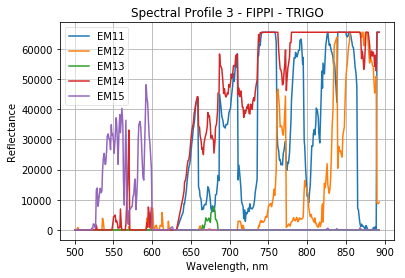

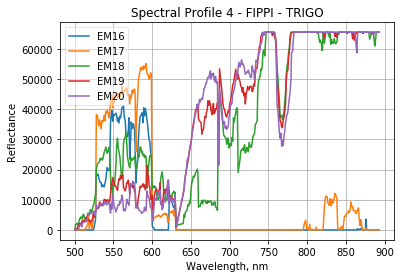

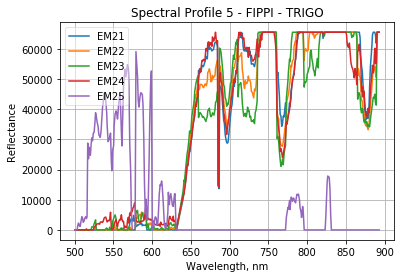

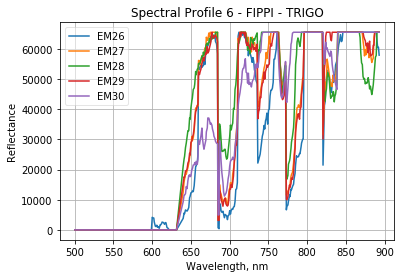

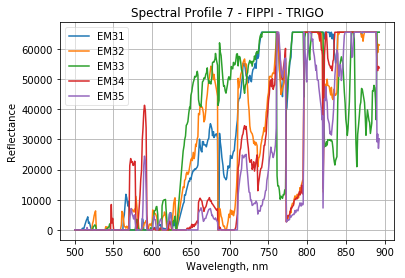

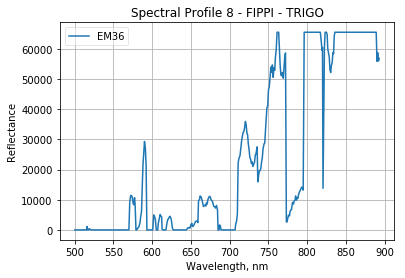

In [ ]:
ee3_axes = {}
ee3_axes['wavelength'] = [float(i) for i in dirs3]
ee3_axes['x']='Wavelength, nm' #x axis label
ee3_axes['y']='Reflectance' #y axis label 
ee3.display(axes=ee3_axes,suffix='TRIGO')

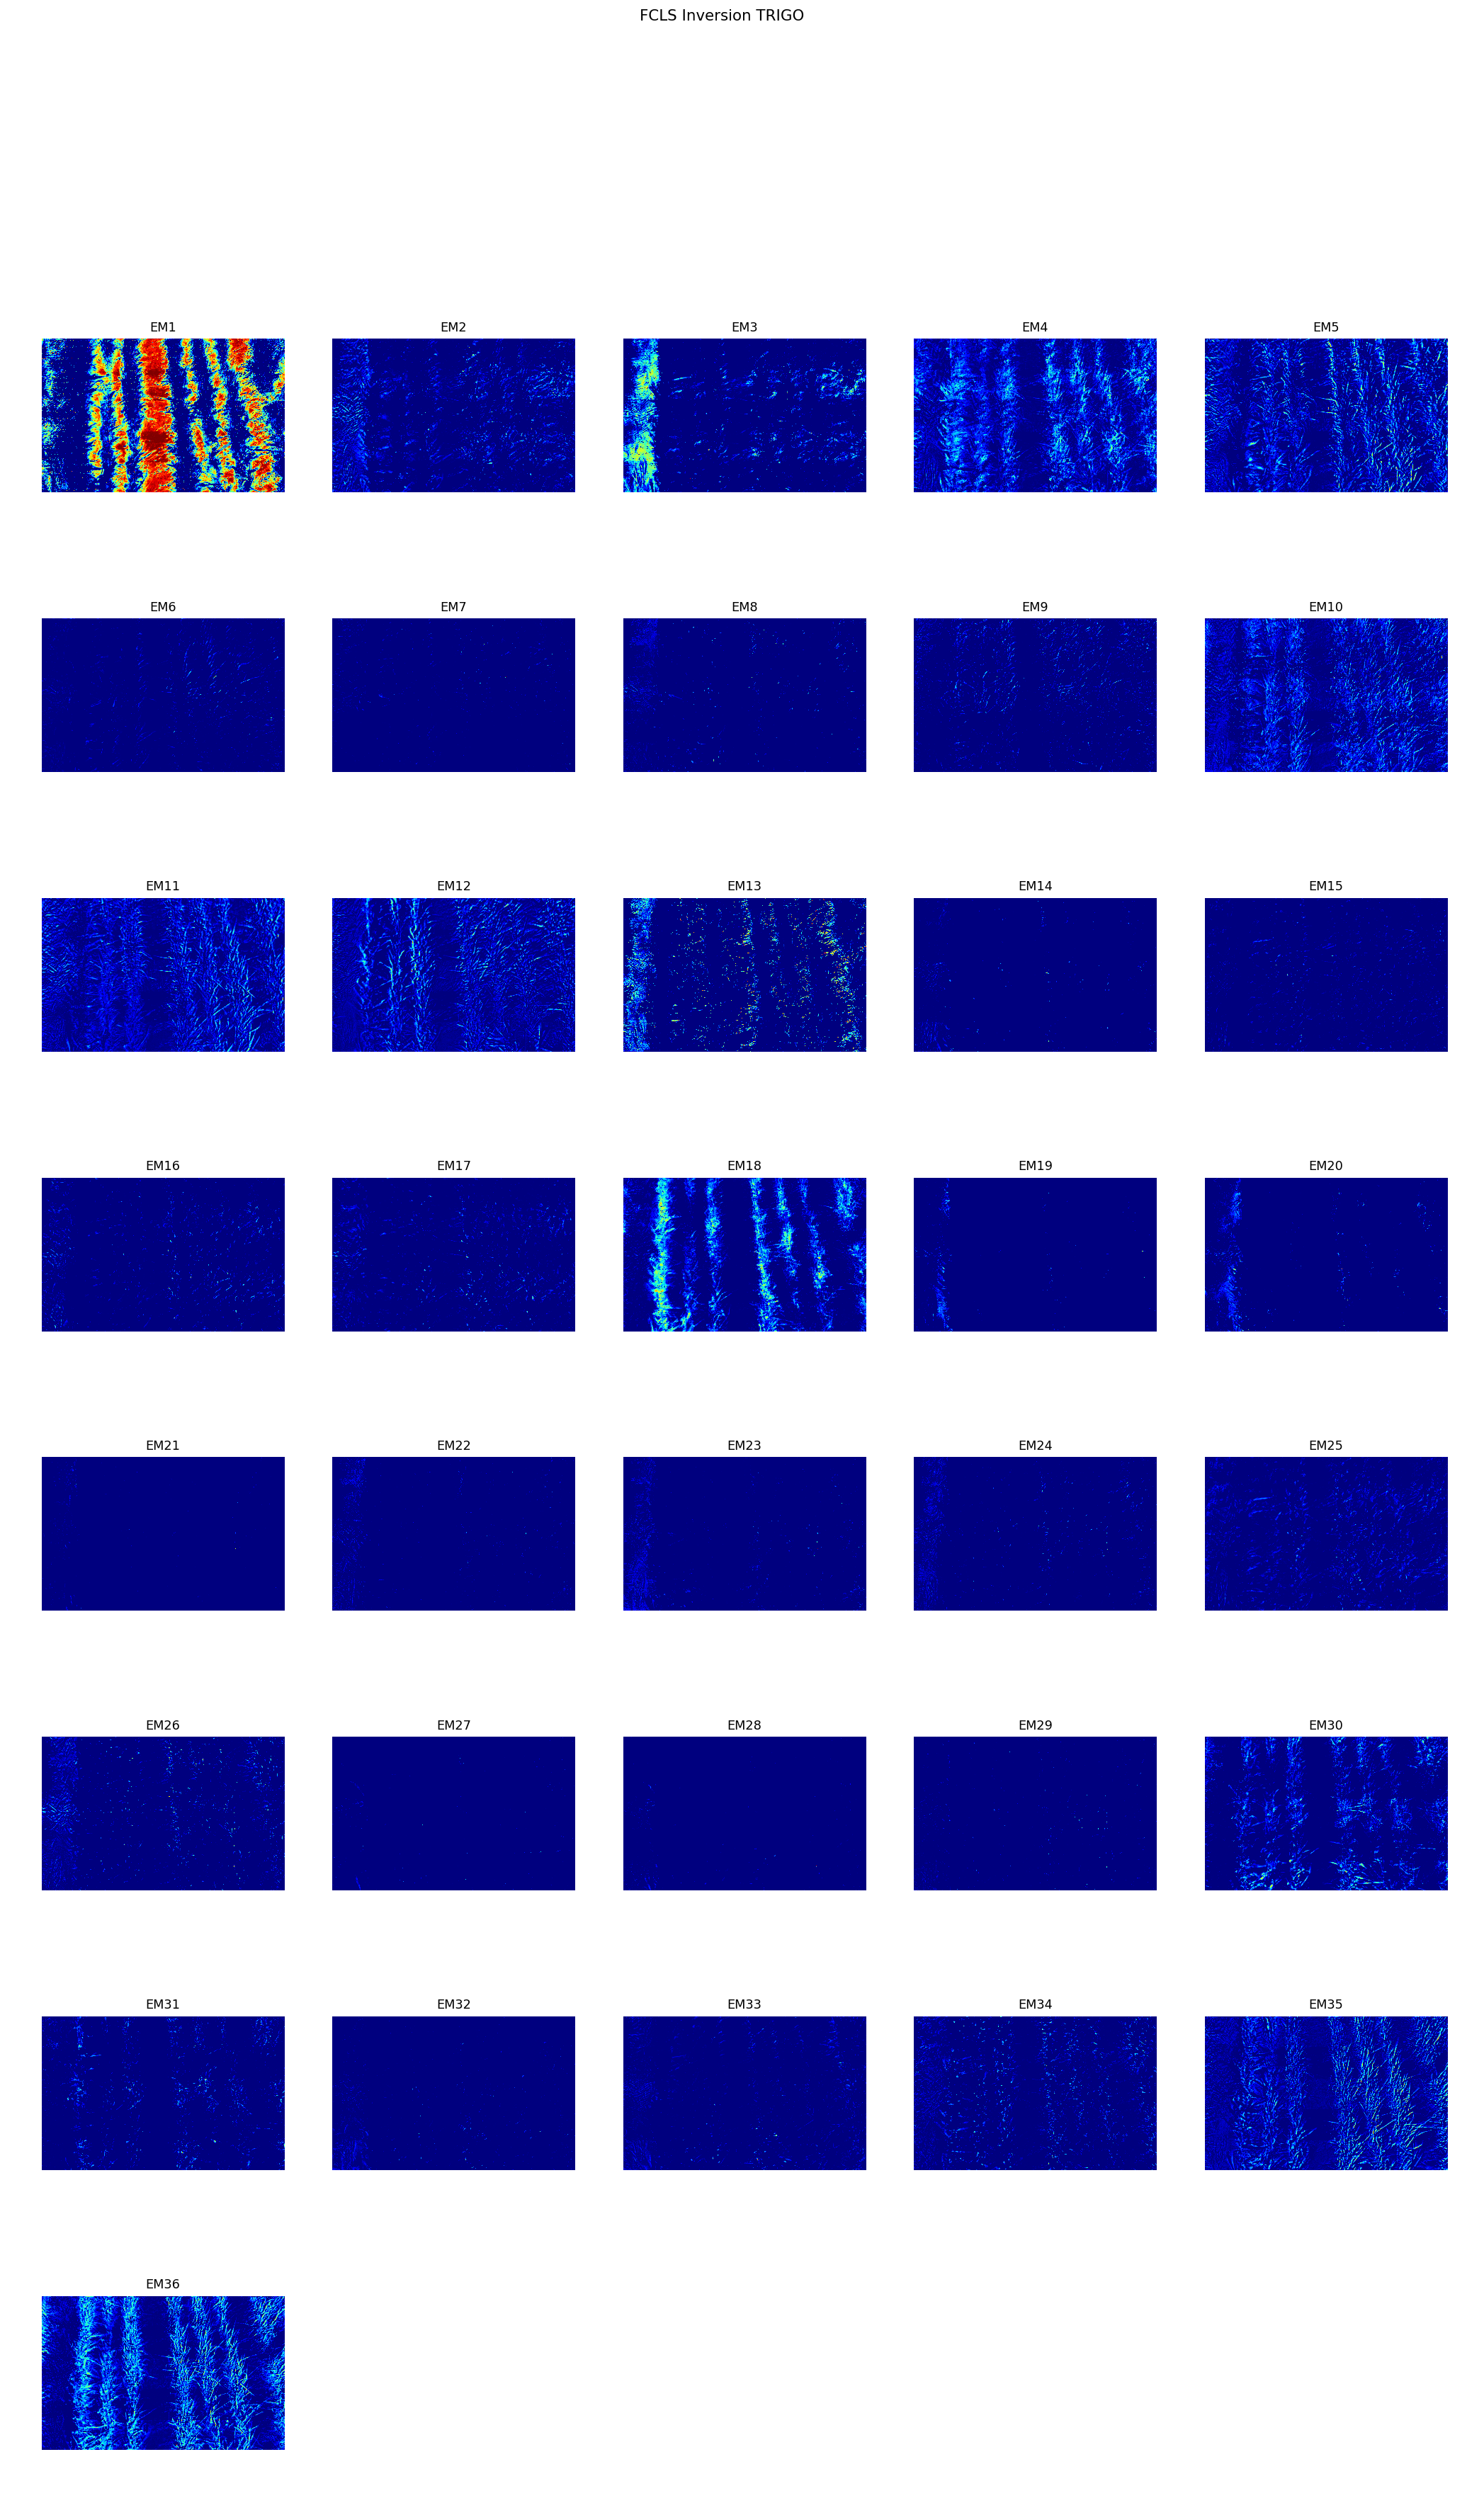

Time: 3160.39045501


<Figure size 432x288 with 0 Axes>

In [ ]:
start_time = time.time()
am = amap.FCLS() #object amap Fully Constrained Least Squares
amaps = am.map(hypercube,U,normalize=False) 
am.display(colorMap='jet',columns=n_endmembers,suffix='TRIGO') # Plot abundance maps
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time))

In [ ]:
print('Abundance Map Mean Values:')
print('EM1:',np.mean(amaps[:,:,0]))
print('EM2:',np.mean(amaps[:,:,1]))
print('EM3:',np.mean(amaps[:,:,2]))
print('EM4:',np.mean(amaps[:,:,3]))
print('EM5:',np.mean(amaps[:,:,4]))

Abundance Map Mean Values:
('EM1:', 0.3057305)
('EM2:', 0.02032144)
('EM3:', 0.04104601)
('EM4:', 0.07870599)
('EM5:', 0.056893084)


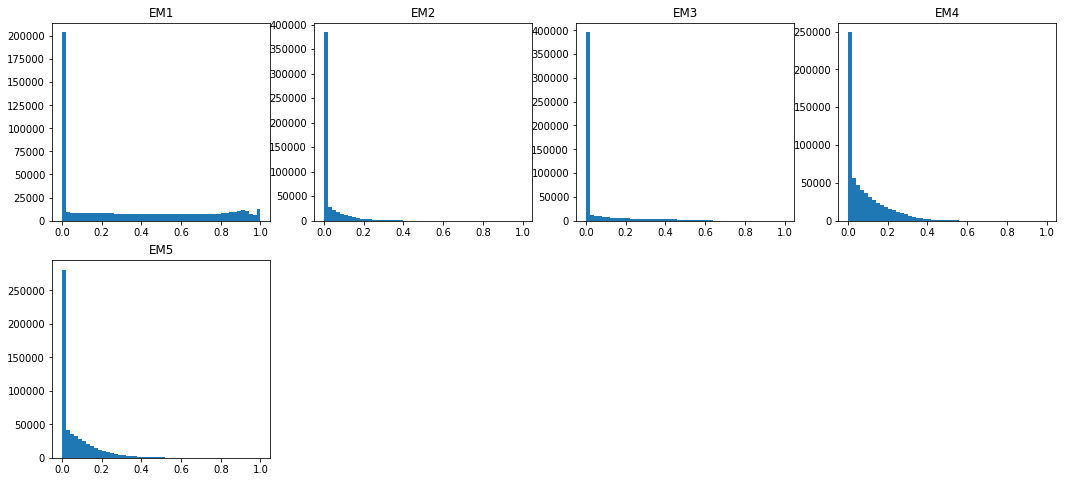

In [ ]:
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(2,4,1); plt.title('EM1')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,0]),bins=50,range=[0,1.0]) 

ax2 = fig.add_subplot(2,4,2); plt.title('EM2')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,1]),bins=50,range=[0,1.0]) 

ax3 = fig.add_subplot(2,4,3); plt.title('EM3')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,2]),bins=50,range=[0,1.0]) 

ax4 = fig.add_subplot(2,4,4); plt.title('EM4')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,3]),bins=50,range=[0,1.0]) 

ax4 = fig.add_subplot(2,4,5); plt.title('EM5')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,4]),bins=50,range=[0,1.0]) 

Pixel Purity Index (PPI)

In [ ]:
start_time = time.time()
ee4 = eea.PPI() #Pixel Purity Index (PPI)
n_endmembers =36
U4 = ee4.extract(hypercube,n_endmembers)
print('Time: ' + str(elapsed_time))

Time: 3190.56921601


In [ ]:
with h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_PPI.hdf5', 'w') as f:
    dset = f.create_dataset("default", data=U4)

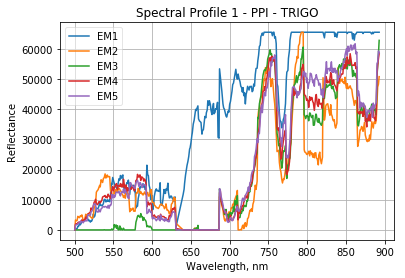

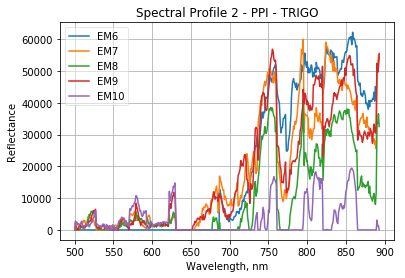

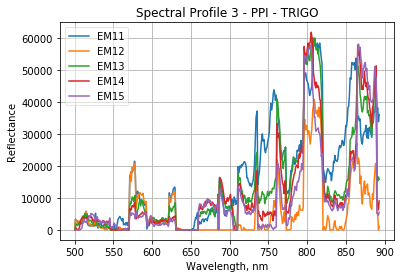

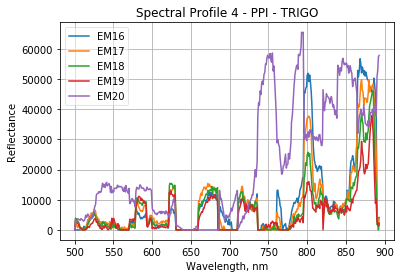

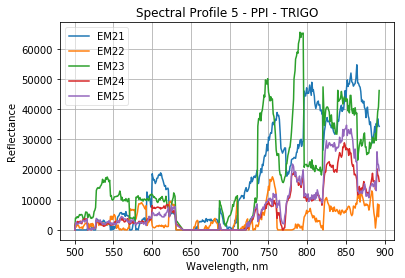

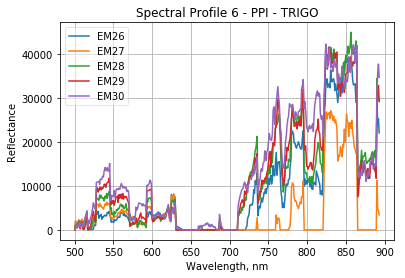

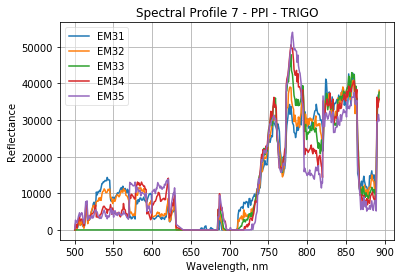

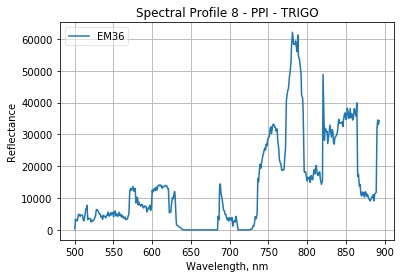

In [ ]:
ee4_axes = {}
ee4_axes['wavelength'] = [float(i) for i in dirs3]
ee4_axes['x']='Wavelength, nm' #x axis label
ee4_axes['y']='Reflectance' #y axis label 
ee4.display(axes=ee4_axes,suffix='TRIGO')

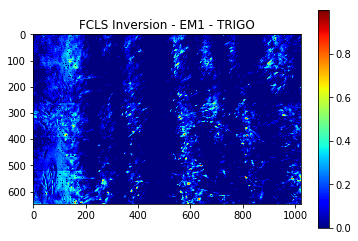

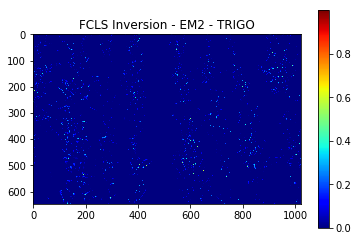

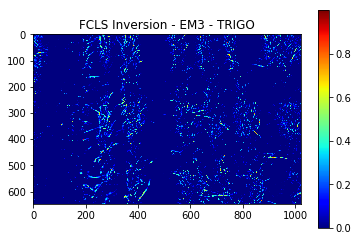

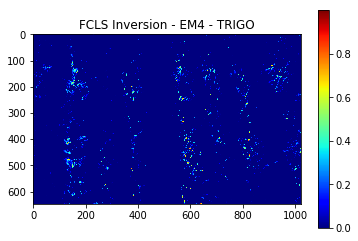

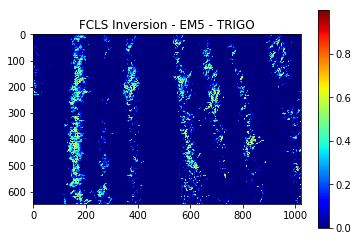

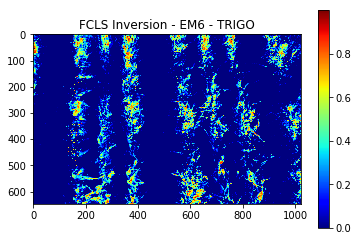

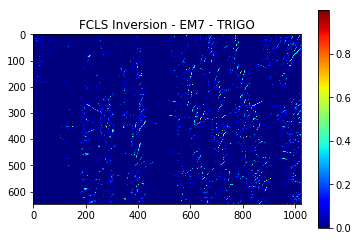

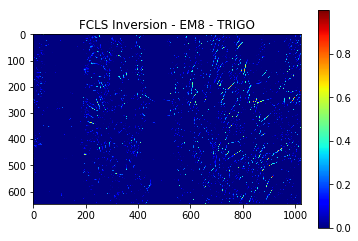

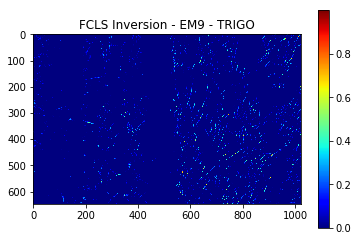

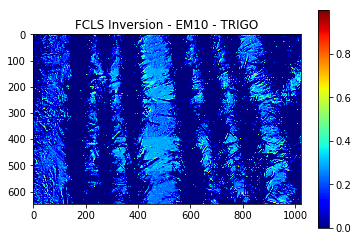

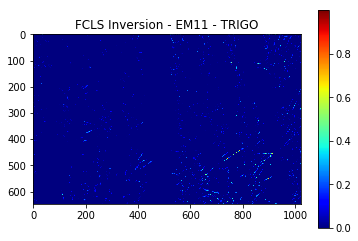

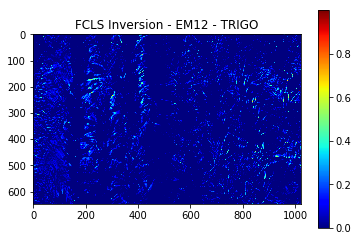

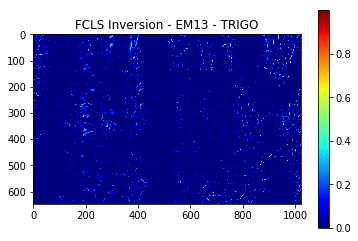

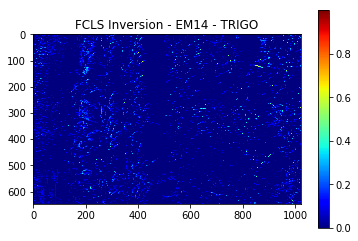

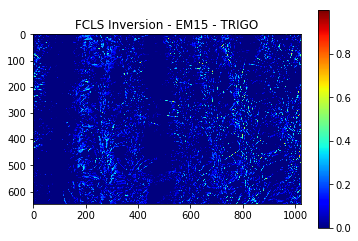

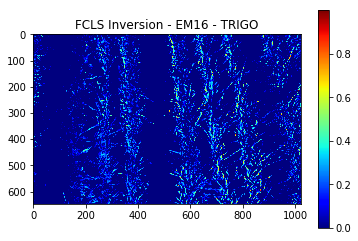

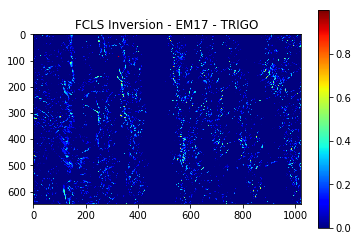

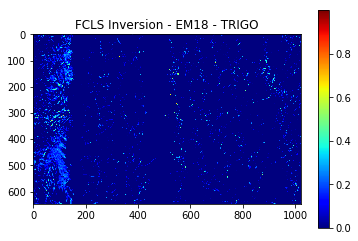

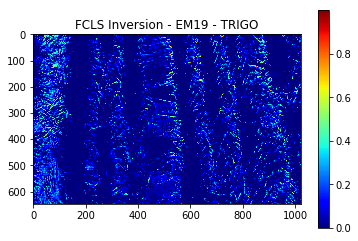

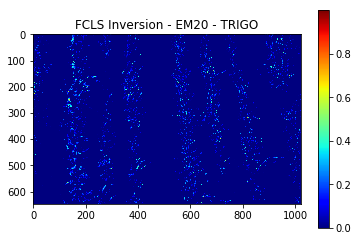

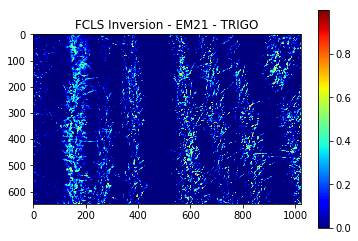

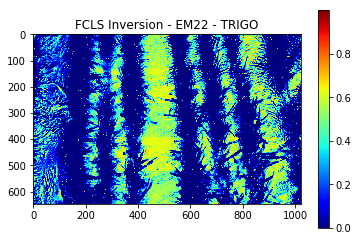

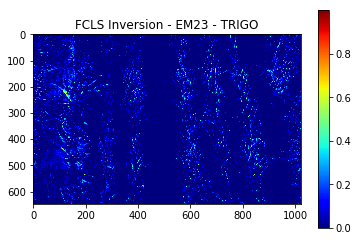

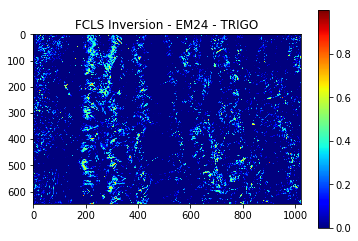

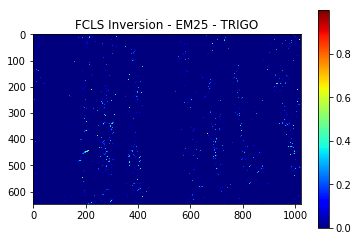

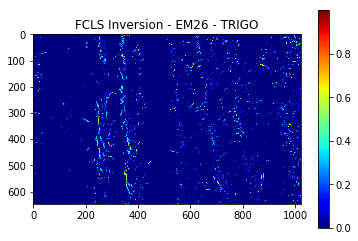

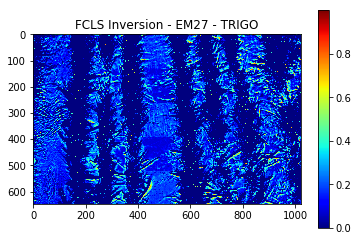

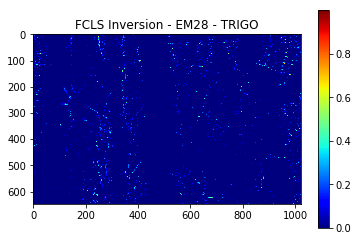

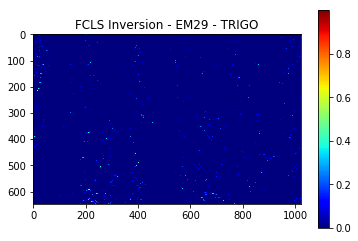

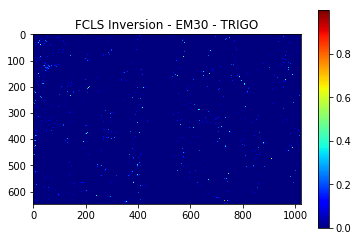

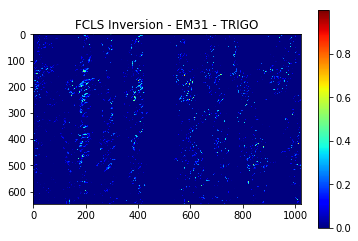

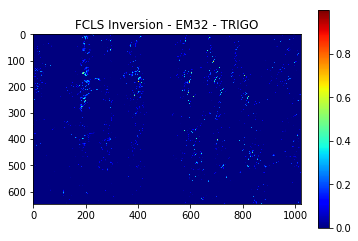

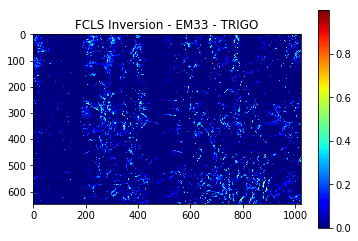

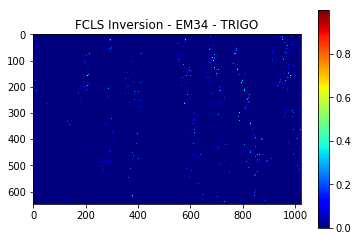

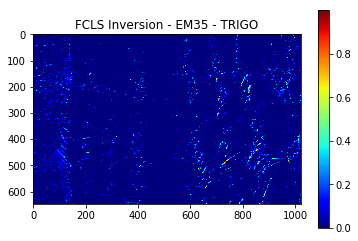

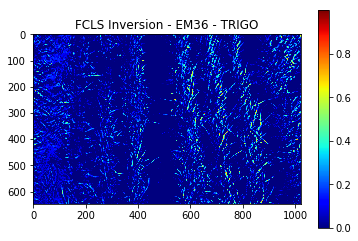

Time: 3769.12812591


<Figure size 432x288 with 0 Axes>

In [ ]:
start_time = time.time()
am = amap.FCLS() #object amap Fully Constrained Least Squares
amaps = am.map(hypercube,U,normalize=False) 
am.display(colorMap='jet',columns=n_endmembers,suffix='TRIGO') # Plot abundance maps
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time))

In [ ]:
print('Abundance Map Mean Values:')
print('EM1:',np.mean(amaps[:,:,0]))
print('EM2:',np.mean(amaps[:,:,1]))
print('EM3:',np.mean(amaps[:,:,2]))
print('EM4:',np.mean(amaps[:,:,3]))
print('EM5:',np.mean(amaps[:,:,4]))

Abundance Map Mean Values:
('EM1:', 0.022525702)
('EM2:', 0.7362611)
('EM3:', 0.112434514)
('EM4:', 0.018088244)
('EM5:', 0.1106906)


In [ ]:
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(2,4,1); plt.title('EM1')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,0]),bins=50,range=[0,1.0]) 

ax2 = fig.add_subplot(2,4,2); plt.title('EM2')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,1]),bins=50,range=[0,1.0]) 

ax3 = fig.add_subplot(2,4,3); plt.title('EM3')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,2]),bins=50,range=[0,1.0]) 

ax4 = fig.add_subplot(2,4,4); plt.title('EM4')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,3]),bins=50,range=[0,1.0]) 

ax4 = fig.add_subplot(2,4,5); plt.title('EM5')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,4]),bins=50,range=[0,1.0]) 

In [ ]:
# Open endmembers found diferent algorithms
import h5py
f1 = h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_NFINDR.hdf5', 'r')
U_NFINDR = f1['default']
f2 = h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_ATGP.hdf5', 'r')
U_ATGP = f2['default']
f3 = h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_FIPPI_2.hdf5', 'r')
U_FIPPI = f3['default']
f4 = h5py.File('/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/U_PPI.hdf5', 'r')
U_PPI = f4['default']


In [ ]:
data={}
data['U_NFINDR']=U_NFINDR
data['U_ATGP'] = U_ATGP
data['U_FIPPI']= U_FIPPI
data['U_PPI'] = U_PPI

In [ ]:
data

{'U_ATGP': <HDF5 dataset "default": shape (36, 386), type "<f4">,
 'U_FIPPI': <HDF5 dataset "default": shape (178, 386), type "<f4">,
 'U_NFINDR': <HDF5 dataset "default": shape (36, 386), type "<f4">,
 'U_PPI': <HDF5 dataset "default": shape (36, 386), type "<f4">}

In [ ]:
data.keys()

['U_ATGP', 'U_PPI', 'U_NFINDR']

In [ ]:
from sklearn.metrics import cohen_kappa_score
n_endmembers = 36
# by endmmebers number 
[cohen_kappa_score(data['U_NFINDR'][:][a], data['U_ATGP'][:][a]) for a in range(n_endmembers)]

[0.02650363665022859,
 1.0,
 1.0,
 1.0,
 0.01919445112110718,
 0.011534147425451446,
 0.155965730026691,
 0.02898678473837324,
 0.006784241994048479,
 0.18072428459346723,
 0.02918686489665967,
 0.3110467920887602,
 0.06112870552654848,
 0.22940716951653506,
 -0.05827706530112797,
 0.0571315941376056,
 0.035723953378655526,
 -0.05827706530112842,
 0.014206325424282906,
 0.01863043387654728,
 0.020345553680746198,
 0.05138578501469493,
 0.024177360015894434,
 0.031903714393801574,
 0.11170171550775598,
 0.19563249250749237,
 0.0634021185353516,
 0.02835685974549773,
 -0.05710518308144863,
 0.018832058706511612,
 -0.015656534347254336,
 0.003753495737726986,
 0.09098822523607819,
 0.019144159654027826,
 0.04206477230425598,
 -0.0005088989462400662]

In [ ]:
[cohen_kappa_score(data['U_NFINDR'][:][a], data['U_PPI'][:][a]) for a in range(n_endmembers)]

[0.0015989465763732724,
 0.05011594340069059,
 0.1423960834450716,
 -0.0024143317981701884,
 0.03366510341104623,
 0.16626183741237233,
 0.05697200403391911,
 0.027582704093725763,
 0.025166728731507604,
 -0.1196123734645369,
 0.025437266475334508,
 -0.005638293735661382,
 0.02426693629929244,
 0.05054156742656257,
 0.03101203420763743,
 0.03837633792708439,
 0.05588214562627769,
 0.0359361199994207,
 0.0019228808250906226,
 -0.014544464115484157,
 0.029243655560867277,
 0.03414569904667164,
 0.02188858695652174,
 0.10699321778447635,
 0.10544611819235217,
 0.0007333636456973158,
 -0.035904116727462076,
 0.014798121045915047,
 -0.03113922040041306,
 0.07829986918876275,
 0.09574772186935698,
 0.0021218591783838114,
 0.0827735886283898,
 0.052338787557296484,
 0.04504033976112298,
 0.02347887847938579]

In [ ]:
[cohen_kappa_score(data['U_ATGP'][:][a], data['U_PPI'][:][a]) for a in range(n_endmembers)]

[0.15416199531165842,
 0.05011594340069059,
 0.1423960834450716,
 -0.0024143317981701884,
 0.07913832521548991,
 0.03468246133596553,
 0.04958329010616591,
 0.08801601993848462,
 0.02306916689787697,
 -0.037268436875430355,
 0.03211320627878045,
 -0.025498427648598776,
 0.021746017219410052,
 0.04245210298384072,
 0.0432106501789421,
 0.026065446321294816,
 0.036944908555544886,
 0.01306177312839718,
 0.016973489928340135,
 0.07827575259837916,
 0.07627721255880116,
 0.059201506695655826,
 -0.030671775152454783,
 0.026471734093379107,
 0.035354444692512144,
 -0.005353783822890978,
 0.02191170870316661,
 0.0888746134424907,
 0.0726823307226574,
 0.007844126010281394,
 -0.008353968815478119,
 -0.021794758669372527,
 0.17971044483886656,
 0.026271905031090892,
 0.14118396104304987,
 -0.025339341344014166]

In [ ]:
# reshape to one col
U_NFINDR2 = np.array(U_NFINDR)
U_NFINDR2 = U_NFINDR2.reshape((-1))
U_ATGP2 = np.array(U_ATGP)
U_ATGP2 = U_ATGP2.reshape((-1))
U_PPI2 = np.array(U_PPI)
U_PPI2 = U_PPI2.reshape((-1))

In [ ]:
# by algorithm accord
print(cohen_kappa_score(U_NFINDR2, U_ATGP2))
print(cohen_kappa_score(U_NFINDR2, U_PPI2))
print(cohen_kappa_score(U_ATGP2, U_PPI2))

0.12776043342404764
0.041899206175741055
0.04616282773226388
